## ETL EXTRACCION TRANSFORMACION Y CARGA

Información sobre el proyecto
Una empresa prestadora de servicios de telecomunicaciones nos encarga la realización de un análisis completo que permita reconocer el comportamiento de este sector a nivel nacional.

Consideramos que la principal actividad de la empresa es brindar acceso a internet, pero también es importante considerar el comportamiento asociado al resto de los servicios de comunicación, con el fin de orientar a la empresa en brindar una buena calidad de sus servicios, identificar oportunidades de crecimiento y poder plantear soluciones personalizadas a sus posibles clientes.

Comenzamos haciendo un breve análisis de los datos proporcionados y luego complementamos con información extra.


Importo librerias necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import locale

In [32]:
pd.set_option('display.float_format', '{:.3f}'.format)

Para agilizar creo una funcion para crear los dataframes

In [3]:

def crear_df(nombre: str):
    df = pd.read_excel(r"D:\Denise_Estudio\henry\PI2\Internet.xlsx", sheet_name= nombre)
    return df

Datasets principales
Se nos proporciona un link a la siguiente página web de ENACOM, en donde encontramos 15 datasets a analizar.

1) Acc_vel_loc_sinrangos: Proporciona datos detallados de accesos a internet por diferentes velocidades de conexión en varias localidades de Argentina.
2) Velocidad_sin_Rangos: Muestra estadísticas de acceso a internet desglosadas por velocidad y provincia.
3) Velocidad % por prov: Presenta el porcentaje de accesos a internet por rangos de velocidad en cada provincia.
4) Totales VMD: Contiene los totales de velocidad media descargada (VMD) por región.
5) Accesos_tecnologia_localidad: Incluye los accesos a internet por tecnología en diferentes localidades.
6) Totales Accesos Por Tecnología: Muestra los totales de accesos a internet desglosados por cada tipo de tecnología.
7) Accesos Por Tecnología: Detalla los accesos a internet por tecnología en diferentes provincias.
8) Dial-BAf: Presenta los datos de accesos dial-up y Banda Ancha Fija.
9) Totales Dial-BAf: Muestra los totales de accesos dial-up y Banda Ancha Fija.
10) Penetración-poblacion: Incluye los datos de penetración de internet en la población.
11) Penetracion-hogares: Proporciona información sobre la penetración de internet en hogares.
12) Penetracion-totales: Presenta los totales de penetración de internet.
13) Totales Accesos por velocidad: Muestra los totales de accesos a internet por diferentes velocidades de conexión.
14) Accesos por velocidad: Detalla los accesos a internet desglosados por velocidad en cada provincia.
15) Ingresos: Contiene los datos de ingresos generados por los servicios de internet.


## Velocidad
A continuacion presento las hojas que hablan sobre velocidad

1) Acc_vel_loc_sinrangos: Proporciona datos detallados de accesos a internet por diferentes velocidades de conexión en varias localidades de Argentina.
2) Velocidad_sin_Rangos: Muestra estadísticas de acceso a internet desglosadas por velocidad y provincia.
3) Velocidad % por prov: Presenta el porcentaje de accesos a internet por rangos de velocidad en cada provincia.
4) Totales VMD: Contiene los totales de velocidad media descargada (VMD) por región.
13) Totales Accesos por velocidad: Muestra los totales de accesos a internet por diferentes velocidades de conexión.
14) Accesos por velocidad: Detalla los accesos a internet desglosados por velocidad en cada provincia.


Creo los dataframes

In [4]:
df_acc_vel_loc_sinrangos = crear_df('Acc_vel_loc_sinrangos')
df_velocidad_sin_rangos = crear_df('Velocidad_sin_Rangos')
df_vel_por_prov = crear_df('Velocidad % por prov')
df_total_vdm = crear_df('Totales VMD')
df_acc_x_vel = crear_df('Accesos por velocidad')
df_total_acc_x_vel = crear_df('Totales Accesos por velocidad')


EDA

In [5]:
df_acc_vel_loc_sinrangos

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,2.0,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
3062,TUCUMAN,Trancas,San Pedro de Colalao,90112020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3063,TUCUMAN,Trancas,Villa de Trancas,90112030,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3064,TUCUMAN,Yerba Buena,Villa Carmela,90119020,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Puedo ver que este dataframe trata sobre las velocidades de acceso a internet en Mbps por año por trimestre a nivel localiidad-provincia por velocidades pero sin dar informacion por año, por lo que se deduce que es actual

Reviso valores nulos o faltantes

In [6]:
df_acc_vel_loc_sinrangos.isna().sum()

Provincia        0
Partido          0
Localidad        0
Link Indec       0
Otros         2189
              ... 
850 Mbps      3065
900 Mbps      3065
999 Mbps      3049
1000 Mbps     2648
1024 Mbps     3065
Length: 136, dtype: int64

Noto que existen demasiados datos nulos en este dataframe, por lo que revisare otros para saber si algun otro podria ser de mayor utlidad

In [7]:
df_velocidad_sin_rangos

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2023.0,4.0,Buenos Aires,93351.0,19.0,0.0,0.0,26703.0,187.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023.0,4.0,Capital Federal,0.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023.0,4.0,Catamarca,77.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023.0,4.0,Chaco,4040.0,0.0,0.0,0.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023.0,4.0,Chubut,16589.0,8.0,0.0,0.0,69.0,34.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,2017.0,4.0,Santa Fe,14119.0,0.0,0.0,0.0,3109.0,0.0,7637.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
597,2017.0,4.0,Santiago Del Estero,0.0,0.0,0.0,0.0,41.0,0.0,909.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,2017.0,4.0,Tierra Del Fuego,0.0,0.0,0.0,0.0,6.0,0.0,282.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
599,2017.0,4.0,Tucumán,0.0,0.0,0.0,0.0,105.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se observa que existen datos desde el 2017 al 2023 sobre cantidad de accesos a diferentes velocidades de internet en las provincias, separados por trimestres (Suponiendo que estos son: 1 :Ene-Mar , 2 : Abr-Jun , 3 :Jul-Sept , 4 : Oct-Dic )

Reviso valores faltantes

In [8]:
df_velocidad_sin_rangos.isna().sum()

Año           1
Trimestre     1
Provincia     1
Otros         1
0,256 Mbps    1
             ..
5125 Mbps     1
6000 Mbps     1
7000 Mbps     1
8000 Mbps     1
10000 Mbps    1
Length: 193, dtype: int64

Aqui veo informacion mas completa que podria ser de mayor utilidad

Borro el valor nulo que se observa en la ultima fila, luego prosigo con los otros dataframes


In [9]:
df_velocidad_sin_rangos.dropna(inplace=True)

In [10]:
df_vel_por_prov

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2023,4,Buenos Aires,158.490000
1,2023,4,Capital Federal,234.440000
2,2023,4,Catamarca,89.400000
3,2023,4,Chaco,107.140000
4,2023,4,Chubut,20.290000
...,...,...,...,...
955,2014,1,Santa Cruz,3.315991
956,2014,1,Santa Fe,3.147407
957,2014,1,Santiago Del Estero,2.949472
958,2014,1,Tierra Del Fuego,3.446888


Aqui se presenta la velocidad media de descarga de internet en Mbps para cada provincia, desglosada por año y trimestre, los cuales son valores de tendencia media, para cada provincia desde el 2014 hasta el 2023 en 4 trimestres del año, no se corresponde a porcentajes

Reviso valores nulos y duplicados

In [11]:
df_vel_por_prov.isna().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [12]:
df_vel_por_prov.duplicated().sum()

np.int64(0)

Analizamos los datos outliers o registros atipicos de la columna Mbps

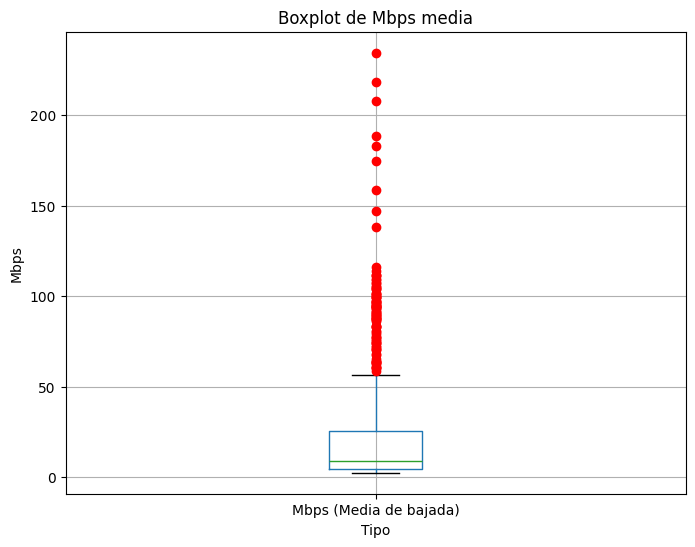

In [13]:
plt.figure(figsize=(8,6))
df_vel_por_prov.boxplot(column=['Mbps (Media de bajada)'], sym='ro')
plt.title('Boxplot de Mbps media')
plt.xlabel('Tipo')
plt.ylabel('Mbps')

plt.show()

Existen muchos outliers, estos se revisaran a continuación

In [15]:
data = df_vel_por_prov[['Mbps (Media de bajada)']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_vel_por_prov[outliers]
registros_con_outliers

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2023,4,Buenos Aires,158.490000
1,2023,4,Capital Federal,234.440000
2,2023,4,Catamarca,89.400000
3,2023,4,Chaco,107.140000
5,2023,4,Córdoba,114.030000
...,...,...,...,...
265,2021,1,Capital Federal,68.290269
289,2020,4,Capital Federal,67.325137
313,2020,3,Capital Federal,63.808520
337,2020,2,Capital Federal,60.484497


Quiero ver que valores se repiten mas

In [16]:
conteo = registros_con_outliers['Provincia'].value_counts()
conteo

Provincia
Capital Federal    16
Buenos Aires        9
Catamarca           6
Chaco               5
Córdoba             5
Corrientes          5
Entre Ríos          5
Formosa             5
La Rioja            5
Misiones            5
Neuquén             5
Río Negro           5
Salta               5
Santa Fe            5
Tucumán             5
San Luis            3
Name: count, dtype: int64

Puedo ver que los valores que mas se repiten son Capital Federal 16, Buenos Aires 9, Catamarca  6

Anlizo dataframe df_total_vdm

In [17]:
df_total_vdm 

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2023,4,139.040000,Oct-Dic 2023
1,2023,3,129.670000,Jul-Sept 2023
2,2023,2,123.950000,Abr-Jun 2023
3,2023,1,110.500000,Ene-Mar 2023
4,2022,4,106.560000,Oct-Dic 2022
5,2022,3,62.460000,Jul-Sept 2022
6,2022,2,58.440000,Abr-Jun 2022
7,2022,1,55.110000,Ene-Mar 2022
8,2021,4,52.340000,Oct-Dic 2021
9,2021,3,48.460000,Jul-Sept 2021


Puedo notar la misma informacion del dataframe anterior pero a nivel nacional, sumando intervalos de cada trimestre.

Borro la columna Trimestre.1

In [18]:
df_total_vdm.drop(columns='Trimestre.1', inplace=True)

Verifico si hay valores nulos o repetidos

In [19]:
df_total_vdm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     40 non-null     int64  
 1   Trimestre               40 non-null     int64  
 2   Mbps (Media de bajada)  40 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


Busco outliers y algunos graficos mas

dataframe df_acc_x_vel

In [20]:
df_acc_x_vel

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0
1,2024,4,Capital Federal,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355061.0,0.0,1474367.0
2,2024,4,Catamarca,71.0,209.0,3065.0,3734.0,4423.0,1827.0,61181.0,77.0,74587.0
3,2024,4,Chaco,236.0,477.0,14811.0,10361.0,6247.0,5729.0,105485.0,4040.0,147386.0
4,2024,4,Chubut,111.0,1088.0,44276.0,31402.0,22843.0,20196.0,33665.0,16589.0,170170.0
...,...,...,...,...,...,...,...,...,...,...,...,...
955,2014,1,Santa Cruz,161.0,1625.0,24972.0,1.0,1.0,0.0,0.0,0.0,26760.0
956,2014,1,Santa Fe,8456.0,124468.0,345225.0,20328.0,6845.0,23.0,668.0,0.0,506013.0
957,2014,1,Santiago Del Estero,1234.0,10531.0,22817.0,2422.0,109.0,0.0,0.0,0.0,37113.0
958,2014,1,Tierra Del Fuego,12.0,607.0,30902.0,6.0,0.0,0.0,0.0,0.0,31527.0


Puedo ver que este dataframe trata sobre las velocidades de acceso a internet en Mbps por año por trimestre a nivel provincial, desde el 2014 hasta el año 2024. Suponiendo que el trimestre se corresponda con los demas dataframes, y teniendo en cuenta la fecha actual (julio del 2024), deduzco que la informacion correspondiente al año 2024 del trimestre 4 es en realidad del 2023, dado que corresponden a datos que aun no acontocen, estos corresponden desde julio hasta diciembre del año 2024 (y el trimestre 4 del 2023 no se encuentra como se muestra debajo)

In [21]:
filtrado = df_acc_x_vel.iloc[:27]
filtrado

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0
1,2024,4,Capital Federal,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355061.0,0.0,1474367.0
2,2024,4,Catamarca,71.0,209.0,3065.0,3734.0,4423.0,1827.0,61181.0,77.0,74587.0
3,2024,4,Chaco,236.0,477.0,14811.0,10361.0,6247.0,5729.0,105485.0,4040.0,147386.0
4,2024,4,Chubut,111.0,1088.0,44276.0,31402.0,22843.0,20196.0,33665.0,16589.0,170170.0
5,2024,4,Córdoba,99.0,8404.0,117068.0,91169.0,51126.0,26948.0,767427.0,17061.0,1079302.0
6,2024,4,Corrientes,67.0,2889.0,19949.0,17984.0,8108.0,5087.0,98904.0,6484.0,159472.0
7,2024,4,Entre Ríos,107.0,4408.0,37150.0,54377.0,16673.0,7236.0,164304.0,14382.0,298637.0
8,2024,4,Formosa,85.0,179.0,21856.0,11563.0,4545.0,272.0,23152.0,350.0,62002.0
9,2024,4,Jujuy,58.0,1343.0,15359.0,11724.0,28741.0,272.0,58543.0,1980.0,118020.0


Corrijo el error

In [22]:
df_acc_x_vel['Año'] = df_acc_x_vel['Año'].replace(2024, 2023)

In [23]:
df_acc_x_vel

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2023,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0
1,2023,4,Capital Federal,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355061.0,0.0,1474367.0
2,2023,4,Catamarca,71.0,209.0,3065.0,3734.0,4423.0,1827.0,61181.0,77.0,74587.0
3,2023,4,Chaco,236.0,477.0,14811.0,10361.0,6247.0,5729.0,105485.0,4040.0,147386.0
4,2023,4,Chubut,111.0,1088.0,44276.0,31402.0,22843.0,20196.0,33665.0,16589.0,170170.0
...,...,...,...,...,...,...,...,...,...,...,...,...
955,2014,1,Santa Cruz,161.0,1625.0,24972.0,1.0,1.0,0.0,0.0,0.0,26760.0
956,2014,1,Santa Fe,8456.0,124468.0,345225.0,20328.0,6845.0,23.0,668.0,0.0,506013.0
957,2014,1,Santiago Del Estero,1234.0,10531.0,22817.0,2422.0,109.0,0.0,0.0,0.0,37113.0
958,2014,1,Tierra Del Fuego,12.0,607.0,30902.0,6.0,0.0,0.0,0.0,0.0,31527.0


Esta informacion se corresponde con el dataframe df_velocidad_sin_rangos y de manera mas clara, analizo los valores nulos para saber si este df me sirve mejor y asi elegir mi mejor opcion


Primero cambio el nombre de las columnas

In [24]:
df_acc_x_vel.rename(columns = {'HASTA 512 kbps':'512kbps','+ 512 Kbps - 1 Mbps':'512kbps-1mbps','+ 1 Mbps - 6 Mbps':'1mbps-6mbps','+ 6 Mbps - 10 Mbps':'6mbps-10mbps','+ 10 Mbps - 20 Mbps':'10mbps-20mbps','+ 20 Mbps - 30 Mbps':'20mbps-30mbps','+ 30 Mbps':'30mbps'}, inplace = True)
df_acc_x_vel

,Año,Trimestre,Provincia,512kbps,512kbps-1mbps,1mbps-6mbps,6mbps-10mbps,10mbps-20mbps,20mbps-30mbps,30mbps,OTROS,Total
0,2023,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0
1,2023,4,Capital Federal,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355061.0,0.0,1474367.0
2,2023,4,Catamarca,71.0,209.0,3065.0,3734.0,4423.0,1827.0,61181.0,77.0,74587.0
3,2023,4,Chaco,236.0,477.0,14811.0,10361.0,6247.0,5729.0,105485.0,4040.0,147386.0
4,2023,4,Chubut,111.0,1088.0,44276.0,31402.0,22843.0,20196.0,33665.0,16589.0,170170.0
...,...,...,...,...,...,...,...,...,...,...,...,...
955,2014,1,Santa Cruz,161.0,1625.0,24972.0,1.0,1.0,0.0,0.0,0.0,26760.0
956,2014,1,Santa Fe,8456.0,124468.0,345225.0,20328.0,6845.0,23.0,668.0,0.0,506013.0
957,2014,1,Santiago Del Estero,1234.0,10531.0,22817.0,2422.0,109.0,0.0,0.0,0.0,37113.0
958,2014,1,Tierra Del Fuego,12.0,607.0,30902.0,6.0,0.0,0.0,0.0,0.0,31527.0


In [25]:
df_acc_x_vel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Año            960 non-null    int64  
 1   Trimestre      960 non-null    int64  
 2   Provincia      960 non-null    object 
 3   512kbps        960 non-null    float64
 4   512kbps-1mbps  960 non-null    float64
 5   1mbps-6mbps    960 non-null    float64
 6   6mbps-10mbps   960 non-null    float64
 7   10mbps-20mbps  960 non-null    float64
 8   20mbps-30mbps  960 non-null    float64
 9   30mbps         960 non-null    float64
 10  OTROS          954 non-null    float64
 11  Total          960 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 90.1+ KB


Se observan valores nulos en OTROS, reemplazo por 0

In [26]:
df_acc_x_vel.fillna(0, inplace=True)

Finalmente opto por trabajar con este dataframe 'df_acc_x_vel' y con 'df_velocidad_x_prov'. Por lo que los uno para trabajarlos

In [27]:
df_accesos_velocidad = pd.merge(df_acc_x_vel,df_vel_por_prov[["Año","Trimestre","Mbps (Media de bajada)","Provincia"]], on=["Año","Trimestre","Provincia"], how="left")
df_accesos_velocidad

,Año,Trimestre,Provincia,512kbps,512kbps-1mbps,1mbps-6mbps,6mbps-10mbps,10mbps-20mbps,20mbps-30mbps,30mbps,OTROS,Total,Mbps (Media de bajada)
0,2023,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0,158.490000
1,2023,4,Capital Federal,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355061.0,0.0,1474367.0,234.440000
2,2023,4,Catamarca,71.0,209.0,3065.0,3734.0,4423.0,1827.0,61181.0,77.0,74587.0,89.400000
3,2023,4,Chaco,236.0,477.0,14811.0,10361.0,6247.0,5729.0,105485.0,4040.0,147386.0,107.140000
4,2023,4,Chubut,111.0,1088.0,44276.0,31402.0,22843.0,20196.0,33665.0,16589.0,170170.0,20.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2014,1,Santa Cruz,161.0,1625.0,24972.0,1.0,1.0,0.0,0.0,0.0,26760.0,3.315991
956,2014,1,Santa Fe,8456.0,124468.0,345225.0,20328.0,6845.0,23.0,668.0,0.0,506013.0,3.147407
957,2014,1,Santiago Del Estero,1234.0,10531.0,22817.0,2422.0,109.0,0.0,0.0,0.0,37113.0,2.949472
958,2014,1,Tierra Del Fuego,12.0,607.0,30902.0,6.0,0.0,0.0,0.0,0.0,31527.0,3.446888


Anlizo nulos, posibles errores y demas informacion relevante sobre el dataframe

In [28]:
df_accesos_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     960 non-null    int64  
 1   Trimestre               960 non-null    int64  
 2   Provincia               960 non-null    object 
 3   512kbps                 960 non-null    float64
 4   512kbps-1mbps           960 non-null    float64
 5   1mbps-6mbps             960 non-null    float64
 6   6mbps-10mbps            960 non-null    float64
 7   10mbps-20mbps           960 non-null    float64
 8   20mbps-30mbps           960 non-null    float64
 9   30mbps                  960 non-null    float64
 10  OTROS                   960 non-null    float64
 11  Total                   960 non-null    float64
 12  Mbps (Media de bajada)  960 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 97.6+ KB


In [31]:
df_accesos_velocidad.describe()

,Año,Trimestre,512kbps,512kbps-1mbps,1mbps-6mbps,6mbps-10mbps,10mbps-20mbps,20mbps-30mbps,30mbps,OTROS,Total,Mbps (Media de bajada)
count,960.00,960.00,960.00,960.00,960.00,960.00,960.00,960.00,960.00,960.00,960.00,960.00
mean,2018.50,2.50,1986.28,9291.11,137188.51,38112.43,37303.29,20197.09,109885.06,6043.61,360007.37,21.62
std,2.87,1.12,12889.17,21018.94,328174.84,64565.36,89536.52,70534.76,434785.79,14503.71,774085.16,29.34
min,2014.00,1.00,6.00,0.00,1483.00,0.00,0.00,0.00,0.00,-1945.00,12406.00,2.57
25%,2016.00,1.75,40.75,347.25,24511.50,3581.00,2127.50,36.75,10.75,0.00,58824.00,4.69
50%,2018.50,2.50,107.00,2263.50,44254.00,12913.50,10082.00,1391.50,2418.50,58.00,109705.00,8.89
75%,2021.00,3.25,468.00,7227.50,84395.00,40126.00,26436.00,9858.75,35332.25,6485.25,188079.25,25.68
max,2023.00,4.00,238920.00,171244.48,2299705.32,403575.00,886678.00,949093.00,4042646.00,122762.00,5011620.00,234.44


In [34]:
df_accesos_velocidad.head()

,Año,Trimestre,Provincia,512kbps,512kbps-1mbps,1mbps-6mbps,6mbps-10mbps,10mbps-20mbps,20mbps-30mbps,30mbps,OTROS,Total,Mbps (Media de bajada)
0,2023,4,Buenos Aires,26909.000,23962.000,228393.000,239339.000,246144.000,110876.000,4042646.000,93351.000,5011620.000,158.490
1,2023,4,Capital Federal,516.000,4544.000,26409.000,48083.000,33925.000,5829.000,1355061.000,0.000,1474367.000,234.440
2,2023,4,Catamarca,71.000,209.000,3065.000,3734.000,4423.000,1827.000,61181.000,77.000,74587.000,89.400
3,2023,4,Chaco,236.000,477.000,14811.000,10361.000,6247.000,5729.000,105485.000,4040.000,147386.000,107.140
4,2023,4,Chubut,111.000,1088.000,44276.000,31402.000,22843.000,20196.000,33665.000,16589.000,170170.000,20.290


## Conclusiones

* En el rango de velocidad + 1 Mbps - 6 Mbps está la mayor cantidad promedio de conexionesn , mientras que la menor cantidad de conexiones está en el intervalo de Hasta 512 kbps. Sin embargo, la desviación estándar es alta, por lo que es recomendable revisar la mediana 



pd.set_option('display.float_format', '{:.2f}'.format)

Guardo en un csv

In [ ]:
df_accesos_velocidad.to_csv('data/velocidad_provincias.csv', index=False)

Analizo el ultimo df de velocidad

In [ ]:
df_total_acc_x_vel

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2024,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
1,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
2,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897
3,2023,1,31437,82048,1001553,1060321,729194,357769,7564819,414754,11241895
4,2022,4,31981,85668,1075272,1109421,765015,335573,7410902,394282,11208114
5,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
6,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
7,2022,1,34890,104840,1263273,1209148,967508,509830,6336187,198333,10624009
8,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794
9,2021,3,40174,41437,2550229,1095772,710122,536364,4948174,163269,10085541


Se observa un error en la fila 0, con datos de 4° trimestre des 2024, se deduce que corresponde al año 2023, lo corrijo

In [ ]:
df_total_acc_x_vel.loc[0, 'Año'] = 2023

In [ ]:
df_total_acc_x_vel

,Año,Trimestre,512kbps,512kbps-1mbps,1mbps-6mbps,6mbps-10mbps,10mbps-20mbps,20mbps-30mbps,30mbps,OTROS,Total
0,2023,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
1,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
2,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897
3,2023,1,31437,82048,1001553,1060321,729194,357769,7564819,414754,11241895
4,2022,4,31981,85668,1075272,1109421,765015,335573,7410902,394282,11208114
5,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
6,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
7,2022,1,34890,104840,1263273,1209148,967508,509830,6336187,198333,10624009
8,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794
9,2021,3,40174,41437,2550229,1095772,710122,536364,4948174,163269,10085541


Observo que abarca datos a nivel nacional sobre velocidades por lo que combino con dataframe 'total_vdm'

Primero cambio el nombre de las columnas y luego hago un join

In [ ]:
df_total_acc_x_vel.rename(columns={ 'Hasta 512 kbps': '512kbps','Entre 512 Kbps y 1 Mbps': '512kbps-1mbps','Entre 1 Mbps y 6 Mbps': '1mbps-6mbps','Entre 6 Mbps y 10 Mbps': '6mbps-10mbps',   'Entre 10 Mbps y 20 Mbps': '10mbps-20mbps', 'Entre 20 Mbps y 30 Mbps': '20mbps-30mbps','Más de 30 Mbps': '30mbps'
}, inplace=True)

In [ ]:
df_accesos_velocidad_total = pd.merge(df_total_acc_x_vel,df_total_vdm[["Año","Trimestre","Mbps (Media de bajada)"]], on=["Año","Trimestre"], how="left")
df_accesos_velocidad_total 

,Año,Trimestre,512kbps,512kbps-1mbps,1mbps-6mbps,6mbps-10mbps,10mbps-20mbps,20mbps-30mbps,30mbps,OTROS,Total,Mbps (Media de bajada)
0,2023,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661,139.040000
1,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908,129.670000
2,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897,123.950000
3,2023,1,31437,82048,1001553,1060321,729194,357769,7564819,414754,11241895,110.500000
4,2022,4,31981,85668,1075272,1109421,765015,335573,7410902,394282,11208114,106.560000
5,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128,62.460000
6,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684,58.440000
7,2022,1,34890,104840,1263273,1209148,967508,509830,6336187,198333,10624009,55.110000
8,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794,52.340000
9,2021,3,40174,41437,2550229,1095772,710122,536364,4948174,163269,10085541,48.460000


Observo una falta dedatos en OTROS desde el 2014 al 2017

In [ ]:
df_accesos_velocidad_total.info

<bound method DataFrame.info of      Año  Trimestre  512kbps  512kbps-1mbps  1mbps-6mbps  6mbps-10mbps  \
0   2023          4    29708          71742       900253        978108   
1   2023          3    30274          80609       945608        998725   
2   2023          2    30827          79405       963510       1028250   
3   2023          1    31437          82048      1001553       1060321   
4   2022          4    31981          85668      1075272       1109421   
5   2022          3    33013          96727      1161370       1151906   
6   2022          2    33667          99498      1193090       1197030   
7   2022          1    34890         104840      1263273       1209148   
8   2021          4    41262          28521      1413208       1245333   
9   2021          3    40174          41437      2550229       1095772   
10  2021          2    40172          42024      2531271       1080279   
11  2021          1    39487          41674      2593477       1072722   
12  20

In [ ]:
df_accesos_velocidad_total.describe()

,Año,Trimestre,512kbps,512kbps-1mbps,1mbps-6mbps,6mbps-10mbps,10mbps-20mbps,20mbps-30mbps,30mbps,OTROS,Total,Mbps (Media de bajada)
count,40.000000,40.000000,40.0000,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,4.000000e+01,40.000000
mean,2018.500000,2.500000,47670.6250,222986.575000,3.292524e+06,9.146983e+05,8.952789e+05,4.847302e+05,2.637241e+06,145046.600000,8.640177e+06,34.341500
std,2.908872,1.132277,49981.9869,194006.387383,1.497346e+06,2.351130e+05,4.602764e+05,4.434259e+05,2.959224e+06,129164.653258,1.696189e+06,38.280484
min,2014.000000,1.000000,5675.0000,28521.000000,9.002530e+05,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.000000,6.272846e+06,3.617127
25%,2016.000000,1.750000,30132.5000,77489.250000,2.545490e+06,8.438092e+05,6.962432e+05,1.119172e+05,3.052150e+04,0.000000,7.144003e+06,5.809965
50%,2018.500000,2.500000,36230.0000,198451.000000,3.327425e+06,9.848485e+05,8.029080e+05,4.222760e+05,8.691535e+05,165319.000000,8.560895e+06,16.665000
75%,2021.000000,3.250000,41087.5000,316865.000000,4.848150e+06,1.060943e+06,1.061018e+06,6.049265e+05,4.733012e+06,237051.750000,9.918698e+06,46.337500
max,2023.000000,4.000000,241713.0000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,8.224736e+06,414754.000000,1.154766e+07,139.040000


## AGREGAR GRAFICOS

decido que trabajare con estos datos por lo que guardo en un csv

In [ ]:
df_accesos_velocidad_total.to_csv('data/velocidad_nacional.csv', index=False)

Conclusiones:

In [ ]:
def imprimir_nombres_columnas(df):
    for column in df.columns:
        print(column)

In [ ]:
imprimir_nombres_columnas(df_acc_vel_loc_sinrangos)

In [ ]:
# Función para extraer el valor de Mbps de los nombres de columnas
def extraer_mbps(nombre_columna):
    match = re.search(r'(\d+,\d+|\d+(\.\d+)?|,\d+) Mbps', nombre_columna)
    if match:
        return float(match.group(1).replace(',', '.'))
    return None

In [ ]:
agrupaciones = {}

In [ ]:
# Lista de columnas
columnas = [
    'Provincia', 'Partido', 'Localidad', 'Link Indec', 'Otros', '0,256 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps', '1,5 Mbps', '2 Mbps', 
    '2,2 Mbps', '2,5 Mbps', '3 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps', '4,5 Mbps', '5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps', '8 Mbps', 
    '9 Mbps', '10 Mbps', '10,1 Mbps', '10,2 Mbps', '11 Mbps', '12 Mbps', '12,3 Mbps', '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps', 
    '20 Mbps', '20,5 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps', '25 Mbps', '25,1 Mbps', '25,5 Mbps', '26 Mbps', '27 Mbps', '30 Mbps', '31 Mbps', 
    '32 Mbps', '34 Mbps', '35 Mbps', '36 Mbps', '38 Mbps', '39 Mbps', '40 Mbps', '41 Mbps', '45 Mbps', '46 Mbps', '48 Mbps', '49 Mbps', '50 Mbps', 
    '50,1 Mbps', '50,25 Mbps', '51 Mbps', '55 Mbps', '58 Mbps', '59 Mbps', '60 Mbps', '61 Mbps', '62 Mbps', '64 Mbps', '65 Mbps', '66 Mbps', '70 Mbps', 
    '75 Mbps', '78 Mbps', '80 Mbps', '83 Mbps', '85 Mbps', '90 Mbps', '92 Mbps', '95 Mbps', '98 Mbps', '100 Mbps', '100,1 Mbps', '100,25 Mbps', 
    '105 Mbps', '110 Mbps', '120 Mbps', '122 Mbps', '125 Mbps', '126 Mbps', '130 Mbps', '140 Mbps', '150 Mbps', '155 Mbps', '158 Mbps', '160 Mbps', 
    '164 Mbps', '165 Mbps', '180 Mbps', '200 Mbps', '205 Mbps', '212 Mbps', '220 Mbps', '225 Mbps', '240 Mbps', '246 Mbps', '250 Mbps', '256 Mbps', 
    '275 Mbps', '300 Mbps', '320 Mbps', '325 Mbps', '330 Mbps', '340 Mbps', '350 Mbps', '400 Mbps', '450 Mbps', '480 Mbps', '500 Mbps', '512 Mbps', 
    '520 Mbps', '540 Mbps', '600 Mbps', '680 Mbps', '700 Mbps', '800 Mbps', '850 Mbps', '900 Mbps', '999 Mbps', '1000 Mbps', '1024 Mbps'
]

In [ ]:
# Agrupar las columnas de a tres y calcular la suma
import re
contador = 0
grupo = 1
for col in columnas:
    mbps = extraer_mbps(col)
    if mbps is not None:
        if f'grupo_{grupo}' not in agrupaciones:
            agrupaciones[f'grupo_{grupo}'] = []
        agrupaciones[f'grupo_{grupo}'].append(col)
        contador += 1
        if contador == 3:
            grupo += 1
            contador = 0

In [ ]:
# Crear un nuevo DataFrame con las sumas de cada grupo
df_agrupado = pd.DataFrame()
for grupo, cols in agrupaciones.items():
    df_agrupado[grupo] = df_acc_vel_loc_sinrangos[cols].sum(axis=1)


In [ ]:
df_agrupado

Reviso los nulos de las columnas

deduzco que hay muchas columnas con muy pocos datos, por lo que los tratare como outliers
verifico que datos son

In [ ]:
columns_check= ['1024 Mbps' ]
valores = df_acc_vel_loc_sinrangos.dropna(subset=columns_check)
valores

In [ ]:
columns_check= ['999 Mbps' ]
valores = df_acc_vel_loc_sinrangos.dropna(subset=columns_check)
valores

lleno con valor 0 los nulos

In [ ]:
df_acc_vel_loc_sinrangos.fillna(0.0, inplace=True)

In [ ]:
# Agrupar columnas (ejemplo)
df_acc_vel_loc_sinrangos['group1'] = df_acc_vel_loc_sinrangos.iloc[:, :20].mean(axis=1)
df_acc_vel_loc_sinrangos['group2'] = df_acc_vel_loc_sinrangos.iloc[:, 20:40].mean(axis=1)

EDA

In [ ]:
promedio_por_provincia= df_acc_vel_loc_sinrangos.groupby('Provincia').agg({'Accesos por cada 100 hogares': 'mean', 'Accesos por cada 100 hab': 'mean'})

plt.figure(figsize=(10, 6))
plt.plot(promedio_por_anio.index, promedio_por_anio['Accesos por cada 100 hogares'], label='Accesos por cada 100 hogares', marker='o')
plt.plot(promedio_por_anio.index, promedio_por_anio['Accesos por cada 100 hab'], label='Accesos por cada 100 hab', marker='o')

plt.title('Total de Accesos por cada 100 hogares y 100 hab por Año')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_velocidad_sin_rangos

In [ ]:
df_velocidad_sin_rangos.isna().sum()

borro los nulos fila 600

In [ ]:
df_velocidad_sin_rangos.dropna(inplace=True)

In [ ]:
df_velocidad_sin_rangos

In [ ]:
df_velocidad_sin_rangos.shape

lleno con valor 0 los nulos

In [ ]:
df_velocidad_sin_rangos.fillna(0.0, inplace=True)

Para poder relacionar las tablas vamos a agrupar segun año y trimestre


In [ ]:
df_velocidad_x_prov

In [ ]:
df_total_vdm

# ACCESOS A TECNOLOGIAS

5) Accesos_tecnologia_localidad: Incluye los accesos a internet por tecnología en diferentes localidades.
6) Totales Accesos Por Tecnología: Muestra los totales de accesos a internet desglosados por cada tipo de tecnología.
7) Accesos Por Tecnología: Detalla los accesos a internet por tecnología en diferentes provincias.
8) Dial-BAf: Presenta los datos de accesos dial-up y Banda Ancha Fija.
9) Totales Dial-BAf: Muestra los totales de accesos dial-up y Banda Ancha Fija.

In [ ]:
df_acc_tec_localidad = crear_df('Accesos_tecnologia_localidad')
df_acc_x_tecnología = crear_df('Accesos Por Tecnología')
df_total_acc_x_tec = crear_df('Totales Accesos Por Tecnología')

In [ ]:
df_acc_tec_localidad

In [ ]:
df_acc_x_tecnología

podemos notar un aviso: 'Los datos provinciales no coinciden a nivel nacional, ya que se incorporó información que no contiene apertuta a nivel geográfico.'

In [ ]:
df_acc_x_tecnología.iloc[961]

In [ ]:
df_total_acc_x_tec

# Internet-Penetración

En este primer archivo .xlsx encontramos 

1) Penetración-poblacion: en donde vemos que incluye datos sobre la cantidad de accesos a internet por cada 100 habitantes, según la provincia, el año y el trimestre. 
2) Penetracion-hogares: en donde vemos que incluye datos sobre la cantidad de accesos a internet por cada 100 hogares, según la provincia, el año y el trimestre.
3) Penetracion-totales: en donde vemos que incluye los totales nacionales de accesos a internet por cada 100 hogares y por cada 100 habitantes, según el año y el trimestre.

In [ ]:
df_penetracion_hogares = crear_df('Penetracion-hogares')
df_penetracion_poblacion = crear_df('Penetración-poblacion')
df_penetracion_total = crear_df('Penetracion-totales')

In [ ]:
df_penetracion_poblacion

In [ ]:
df_penetracion_hogares

combino ambos para tener todo un mismo datafrme

In [ ]:
df_penetracion = pd.merge(df_penetracion_hogares, df_penetracion_poblacion, on=['Año', 'Trimestre', 'Provincia'])

In [ ]:
df_penetracion

cambio nombre de columnas

In [ ]:
#df_penetracion.rename(columns={'Accesos por cada 100 hogares': 'porcentaje acceso hogares','Accesos por cada 100 hab': 'porcentaje acceso habitantes'}, inplace=True)

In [ ]:
df_penetracion

In [ ]:
df_penetracion_total 

tenemos informacion a nivel nacional y a nivel provincial, por lo que renombro los dataframes

In [ ]:
df_penetracion_nacional = df_penetracion_total
del df_penetracion_total
df_penetracion_provincial = df_penetracion
del df_penetracion

EDA

verifico la existencia de datos nulos

In [ ]:
df_penetracion_provincial.isnull().sum()

In [ ]:
df_penetracion_provincial.info()

analiso duplicados

In [ ]:
df_penetracion_provincial.duplicated().sum()

verifico outliers

In [ ]:
plt.figure(figsize=(8,6))
df_penetracion_provincial.boxplot(column=['Accesos por cada 100 hogares', 'Accesos por cada 100 hab'], sym='ro')
plt.title('Boxplot de accesos')
plt.xlabel('Columnas')
plt.ylabel('Valores')

plt.show()

Encontramos un monton de valores atipicos o fuera del rango intercuartil 
Procedemos a investigar los registros con dichos valores.

In [ ]:
data = df_penetracion_provincial[['Accesos por cada 100 hogares']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_penetracion_provincial[outliers]
registros_con_outliers

Podemos notar que todos los outliers son de capital federal

In [ ]:
data = df_penetracion_provincial[['Accesos por cada 100 hab']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_penetracion_provincial[outliers]
registros_con_outliers

Igual que antes, vemos que todos los registros pertenecen a Capital Federal, pudiendo concluir que en la provincia existe por mucho un gran acceso y demanda de servicio de internet.

Grafico de lineas

In [ ]:
promedio_por_anio = df_penetracion_provincial.groupby('Año').agg({'Accesos por cada 100 hogares': 'mean', 'Accesos por cada 100 hab': 'mean'})

plt.figure(figsize=(10, 6))
plt.plot(promedio_por_anio.index, promedio_por_anio['Accesos por cada 100 hogares'], label='Accesos por cada 100 hogares', marker='o')
plt.plot(promedio_por_anio.index, promedio_por_anio['Accesos por cada 100 hab'], label='Accesos por cada 100 hab', marker='o')

plt.title('Total de Accesos por cada 100 hogares y 100 hab por Año')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

selected_columns = df_penetracion_provincial[['Accesos por cada 100 hab','Provincia',]]
grouped = selected_columns.groupby(["Provincia"]).sum()

# Gráfico de barras apiladas
grouped.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Distribución de accesos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de accesos')
plt.legend(title='Cantidad de accesos')
plt.show()
     

grafico de barras para ver la distribucion de acceso cada 100 habietantes y 100 hogares

In [ ]:
# Seleccionar las columnas necesarias
selected_columns = df_penetracion_provincial[['Accesos por cada 100 hab', 'Accesos por cada 100 hogares', 'Provincia']]

# Agrupar por provincia
grouped = selected_columns.groupby("Provincia").sum()

# Gráfico de barras apiladas con dos series de datos
ax = grouped.plot(kind='bar', stacked=False, figsize=(8,4))

# Personalización del gráfico
plt.title('Distribución de accesos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de accesos')
plt.legend(title='Tipo de acceso')
plt.tight_layout()  # Ajusta el diseño para evitar que las etiquetas se recorten


In [ ]:
selected_columns = df_penetracion_provincial[['Accesos por cada 100 hogares','Provincia',]]
grouped = selected_columns.groupby(["Provincia"]).sum()

# Gráfico de barras apiladas
grouped.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Distribución de accesos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de accesos')
plt.legend(title='Cantidad de accesos')
plt.show()
     

# DIAL-BAF
8) Dial-BAf: Presenta los datos de accesos dial-up y Banda Ancha Fija.
9) Totales Dial-BAf: Muestra los totales de accesos dial-up y Banda Ancha Fija.

creo los dataframes

In [ ]:
df_dialBAF = crear_df('Dial-BAf')
df_totales_dialBAF =crear_df ('Totales Dial-BAf')

In [ ]:
df_dialBAF

In [ ]:
df_totales_dialBAF

EDA

In [ ]:
df_dialBAF.info()

In [ ]:
df_dialBAF.isnull().sum()

busco esos nulos

In [ ]:
df_dialBAF[df_dialBAF['Dial up'].isnull()]

Reemplazo por 0

In [ ]:
df_dialBAF['Dial up'].fillna(0, inplace=True)

In [ ]:
df_dialBAF.duplicated().sum()

Busco outliers

In [ ]:
plt.figure(figsize=(8,6))
df_dialBAF.boxplot(column=['Banda ancha fija', 'Dial up'], sym='ro')
plt.title('Boxplot de accesos')
plt.xlabel('Tipo')
plt.ylabel('Accesos')

plt.show()

Observo que hay demasiados outliers

In [ ]:
data = df_dialBAF[['Banda ancha fija']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_dialBAF[outliers]
registros_con_outliers

Los outliers pertenecen a CABA, Bs As, Santa Fe y Córdoba. Las cuales constan de las provincias con mayor concentracion de poblacion

In [ ]:
promedio_por_anio_baf = df_dialBAF.groupby('Año').agg({'Banda ancha fija': 'sum', 'Dial up': 'sum'})

plt.figure(figsize=(8, 4))
plt.plot(promedio_por_anio_baf.index, promedio_por_anio_baf['Banda ancha fija'], label='Banda ancha fija', marker='o')
plt.plot(promedio_por_anio_baf.index, promedio_por_anio_baf['Dial up'], label='Dial up', marker='o')

plt.title('Total de Accesos de Banda ancha fija y Dial up por provincia')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_totales_dialBAF

In [ ]:
promedio_por_anio_baf = df_totales_dialBAF.groupby('Año').agg({'Banda ancha fija': 'sum', 'Dial up': 'sum'})

plt.figure(figsize=(8, 4))
plt.plot(promedio_por_anio_baf.index, promedio_por_anio_baf['Banda ancha fija'], label='Banda ancha fija', marker='o')
plt.plot(promedio_por_anio_baf.index, promedio_por_anio_baf['Dial up'], label='Dial up', marker='o')

plt.title('Total de Accesos de Banda ancha fija y Dial up nacional')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

## velocidad de acceso

13) Totales Accesos por velocidad: Muestra los totales de accesos a internet por diferentes velocidades de conexión.
14) Accesos por velocidad: Detalla los accesos a internet desglosados por velocidad en cada provincia.

In [ ]:
df_total_acc_x_vel = crear_df('Totales Accesos por velocidad')
df_acc_x_vel = crear_df('Accesos por velocidad')

In [ ]:
df_total_acc_x_vel

puedo ver que este dataframe trata sobre las velocidades de acceso a internet en Mbps por año por trimestre a nivel nacional

In [ ]:
df_total_acc_x_vel.columns

In [ ]:
df_acc_x_vel

este en cambio es a nivel provincial

In [ ]:
df_acc_x_vel.rename(columns = {'HASTA 512 kbps':'512kbps','+ 512 Kbps - 1 Mbps':'512kbps-1mbps','+ 1 Mbps - 6 Mbps':'1mbps-6mbps','+ 6 Mbps - 10 Mbps':'6mbps-10mbps','+ 10 Mbps - 20 Mbps':'10mbps-20mbps','+ 20 Mbps - 30 Mbps':'20mbps-30mbps','+ 30 Mbps':'30mbps'}, inplace = True)
df_acc_x_vel

## INGRESOS

15) Ingresos: Contiene los datos de ingresos generados por los servicios de internet.

In [ ]:
df_ingresos = crear_df('Ingresos')

In [ ]:
df_ingresos